# **2. histplot**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Paperlogy'

In [2]:
n = 300
 
data = {
    '국어': np.round(np.random.normal(75, 10, size=n).clip(50, 100), 1),
    '영어': np.round(np.random.normal(72, 12, size=n).clip(50, 100), 1),
    '수학': np.round(np.random.normal(70, 15, size=n).clip(50, 100), 1),
    '성별': np.random.choice(['남', '여'], size=n),
    '반': np.random.choice([f'{i}반' for i in range(1,10)], size=n)
}
 
df = pd.DataFrame(data)

## **1. hist 기본**

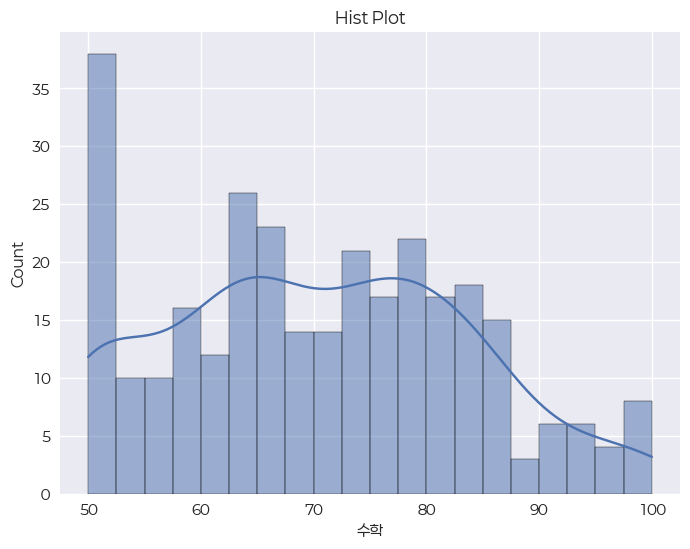

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(
    data=df, x='수학', bins=20, kde=True, ax=ax,
)
ax.set_title('Hist Plot')
plt.show()

## **2. Stats**

| **Stat**       | **y축 값**                 | **특징**                                   |
|-----------------|----------------------------|--------------------------------------------|
| `count`        | Bin 내 데이터 개수         | 절대적인 데이터 분포를 나타냄|
| `frequency`    | Bin 데이터 개수 / 총 개수  | 높이의 합이 `1`(너비 고려)|
| `probability`  | Bin 데이터 개수 / 총 개수  | 높이의 합이 `1`로 표시             |
| `density`      | 확률 밀도                  | 면적의 합이 `1`(너비 고려)         |


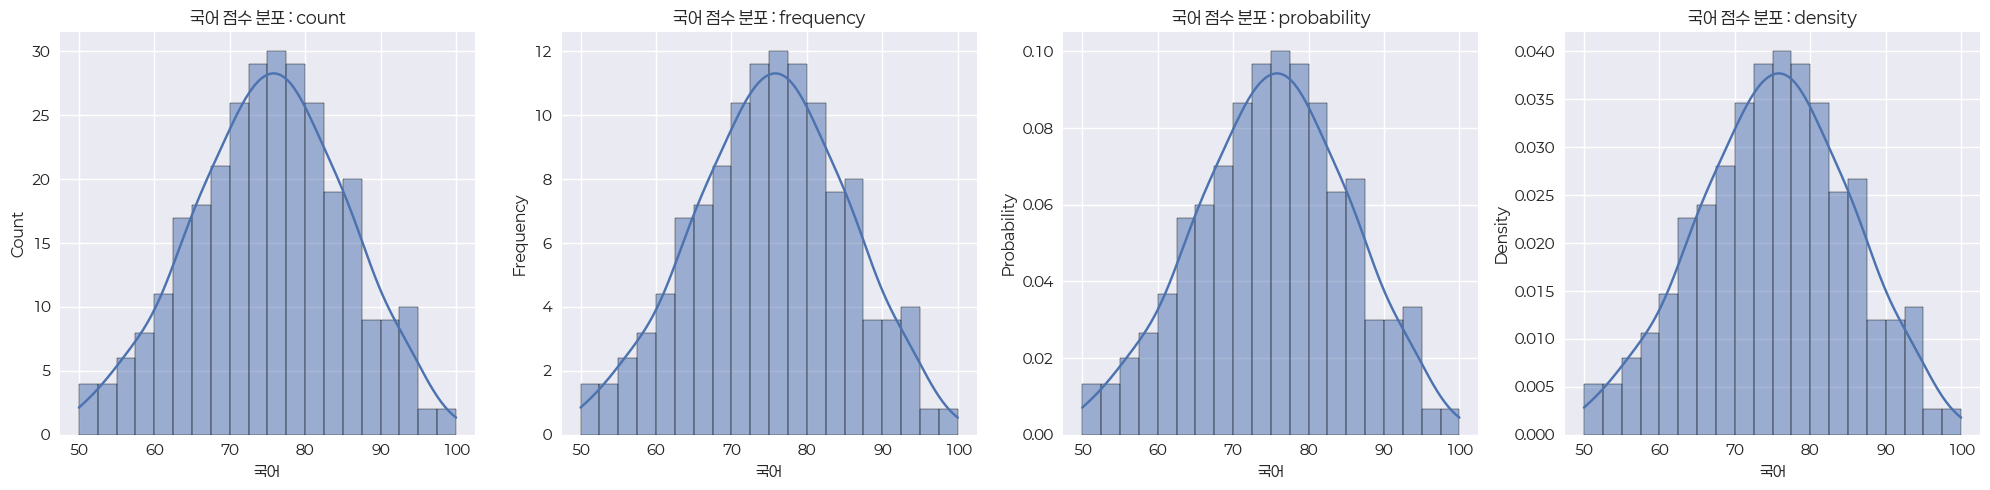

In [4]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
for i,stat in zip(range(4),['count', 'frequency', 'probability', 'density']):
    sns.histplot(data=df, x='국어', bins=20, kde=True,
                 stat=stat, ax=ax[i])
    ax[i].set_title(f'국어 점수 분포 : {stat}')
 
plt.tight_layout()

## **3. multiple**

| **옵션**    | **설명**                                                                 | **특징**                              | **적용 시 결과**                              |
|-------------|--------------------------------------------------------------------------|---------------------------------------|-----------------------------------------------|
| **`layer`** | 그룹별 히스토그램 막대를 겹쳐서 표시                                      | 기본값                                 | 각 그룹이 투명하게 겹쳐서 나타남              |
| **`dodge`** | 그룹별 히스토그램 막대를 나란히 표시                                      | 그룹별 막대가 독립적으로 나타남       | 그룹별로 막대가 서로 옆에 정렬됨             |
| **`stack`** | 그룹별 히스토그램 막대를 쌓아서 표시                                      | 누적 합계 표시                         | 막대가 그룹별 누적되어 나타남                 |
| **`fill`**  | 그룹별 히스토그램 막대를 **비율**로 표시, 각 x축의 합이 1이 됨   | 상대적인 비율 강조                     | 막대 높이가 전체 비율을 기준으로 나타남       |


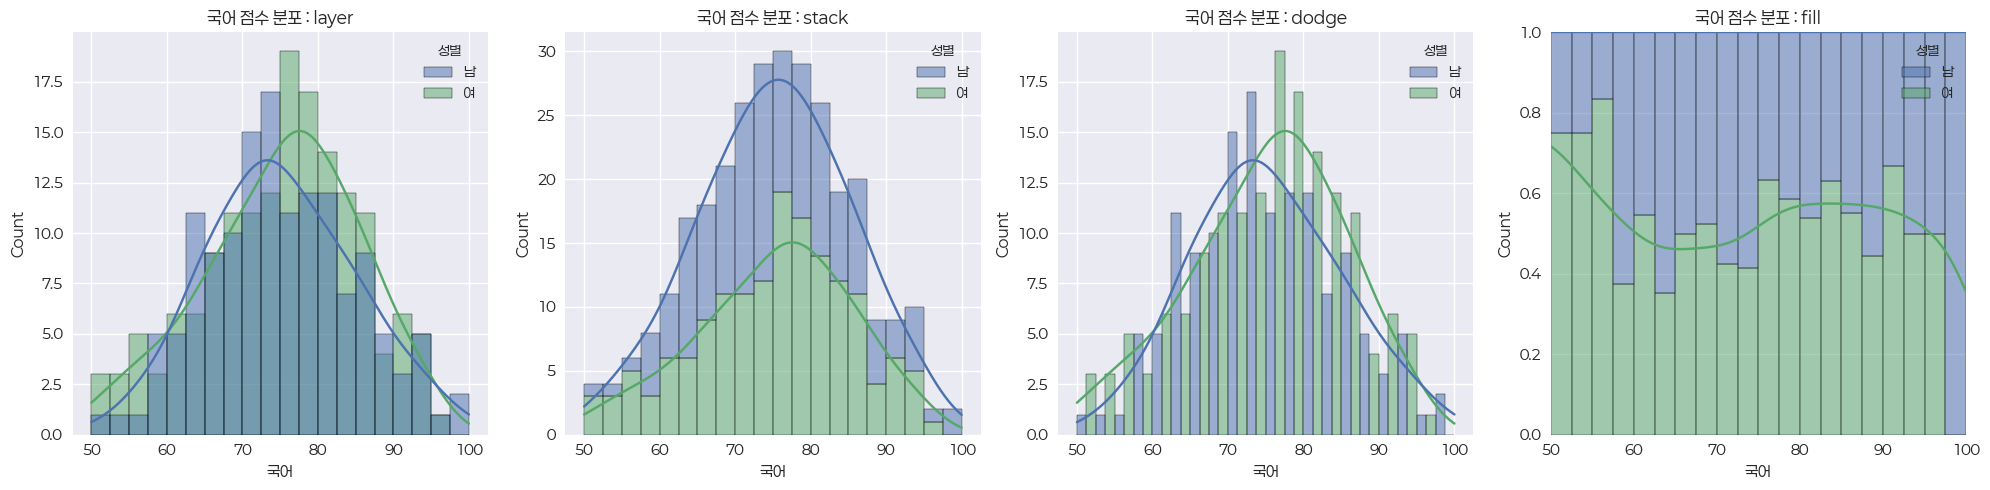

In [5]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
for i,multi in zip(range(4),["layer", "stack", "dodge",'fill']):
    sns.histplot(data=df, x='국어', bins=20, kde=True,
                 hue='성별', multiple=multi, ax=ax[i])
    ax[i].set_title(f'국어 점수 분포 : {multi}')
 
plt.tight_layout()

## **4. example**

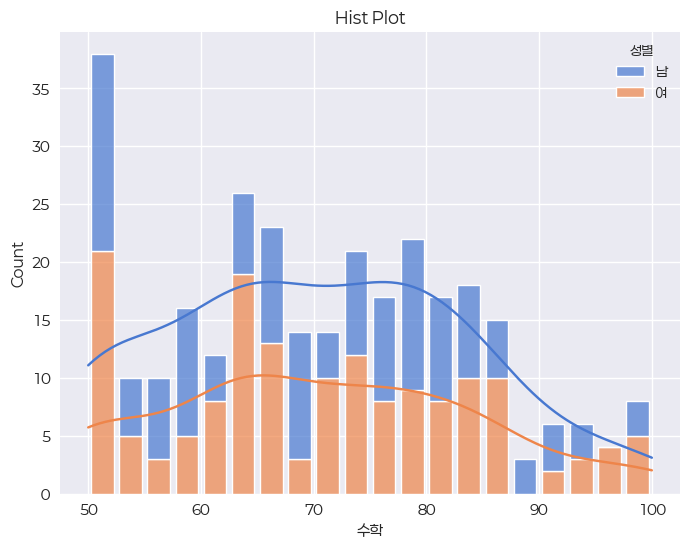

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(
    data=df, x='수학', bins=20, kde=True, ax=ax,
    hue='성별', multiple='stack', alpha=0.7, palette='muted',
    shrink=0.8, edgecolor='white', linewidth=1,
    stat='count',
)
ax.title.set_text('Hist Plot')
plt.show()

## **5. snippet**

In [7]:
# "Seaborn Histplot Template": {
# 	"prefix": "sns_histplot",
# 		"body": [
# 		  "fig, ax = plt.subplots(figsize=(8,6))",
# 		  "sns.histplot(",
# 		  "    # 1. 데이터 설정: 데이터프레임 / X축 / 구간 수",
# 		  "    data=${1:df}, x='${2:col1}', bins=${3:20}, kde=True, ax=ax,",
# 		  "",
# 		  "    # 2. 색상 설정 : 색상 구분 / 누적방식 / 투명도 / 팔레트",
# 		  "    # 누적방식 ['stack', 'layer', 'dodge', 'fill']",
# 		  "    hue='${4:col2}', multiple='${5:stack}', alpha=${6:0.7}, palette='${7:muted}',",
# 		  "",
# 		  "    # 3. 막대 설정 : 대 스타일링: 막대너비 / 테두리색상 / 테두리두께",
# 		  "    shrink=${8:0.8}, edgecolor='${9:white}', linewidth=${10:1},",
# 		  "",
# 		  "    # 4. 통계량 종류 : ['count', 'frequency', 'probability', 'density'] 개수/개수(너비고려)/확률/확률(너비고려)",
# 		  "    stat='${11:count}',",
# 		  ")",
# 		  "ax.title.set_text('${12:Hist Plot}')",
# 		  "plt.show()"
# 		],
# 		"description": "Create a Seaborn histogram with custom styling and different stat options in an object-oriented way"
# 	  }